In [29]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import sqrt
import os
from scipy import stats
os.system('pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org getFamaFrenchFactors')
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
#os.system('pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org getFamaFrenchFactors')
import getFamaFrenchFactors as gff
import pandas_datareader
import matplotlib.colors as mcolors
import math
#import statsmodels.api as sm
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 10]


In [30]:
#seleciona ticker
tickers = ['GOOGL']

#range de datas
start = dt.datetime(2012,6,1)
end = dt.datetime(2022,11,24)

#seleciona preços de fechamento
prices = []

#cria dataframe
df = pd.DataFrame()

df['tickers'] = pandas_datareader.DataReader(tickers, data_source='yahoo',
                                            start=start,
                                            end=end,
                                            )['Adj Close']
#printa valores ausentes
print('Valores ausentes:', df.isnull().sum())


Valores ausentes: tickers    0
dtype: int64


In [31]:
#renomeando a variávle
df = df.rename(columns = {'GOOGL':'Google_stock'})

Text(0.5, 1.0, 'Logarithmic price')

<Figure size 1008x720 with 0 Axes>

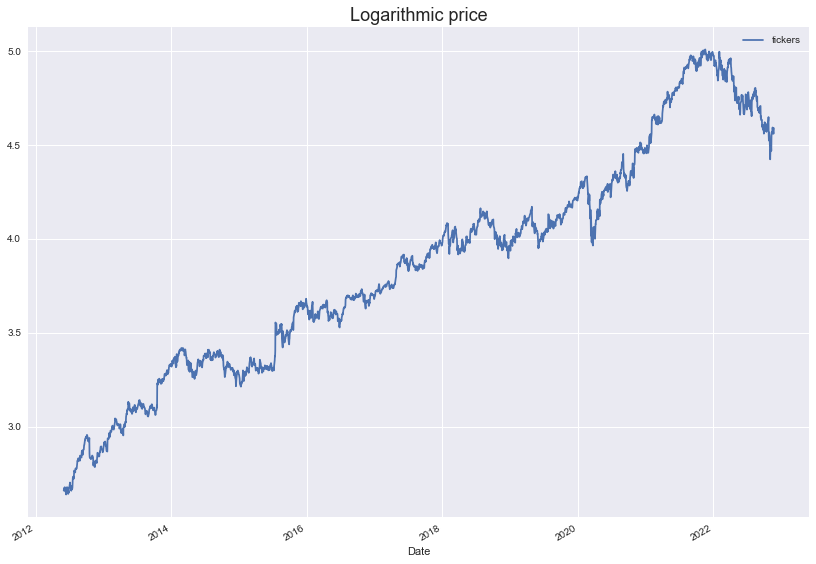

In [32]:
#plotando os preços:
plt.figure()
np.log(df).plot()
plt.legend(loc='best')
plt.title('Logarithmic price', fontsize=18)

In [33]:
#retornando retornos diários
def  rets(x):
    return (x - x.shift(1))/x.shift(1)

returns = df.apply(rets)

Text(0.5, 0.98, 'Análise dos Retornos históricos')

<Figure size 1008x720 with 0 Axes>

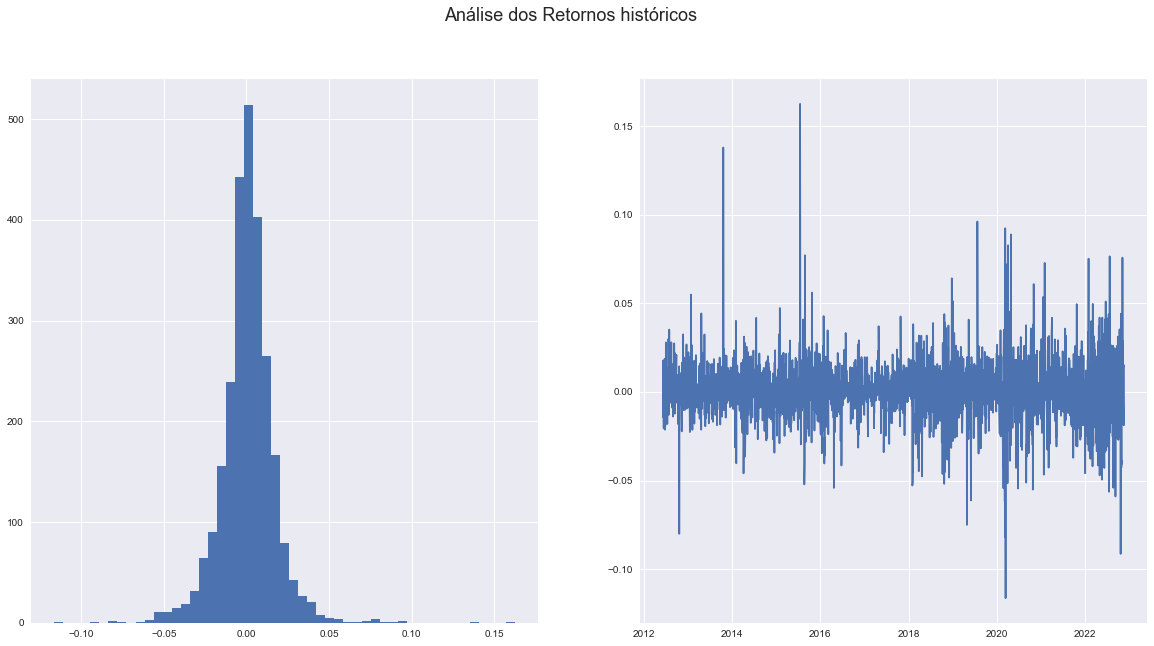

In [35]:
plt.figure()
fig1 , axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].hist(returns, bins=round(sqrt(len(returns))))
axs[1].plot(returns)
fig1.suptitle('Análise dos Retornos históricos', fontsize=18)


ADF Statistics: -12.201837
p-value: 0.000000


<Figure size 1008x720 with 0 Axes>

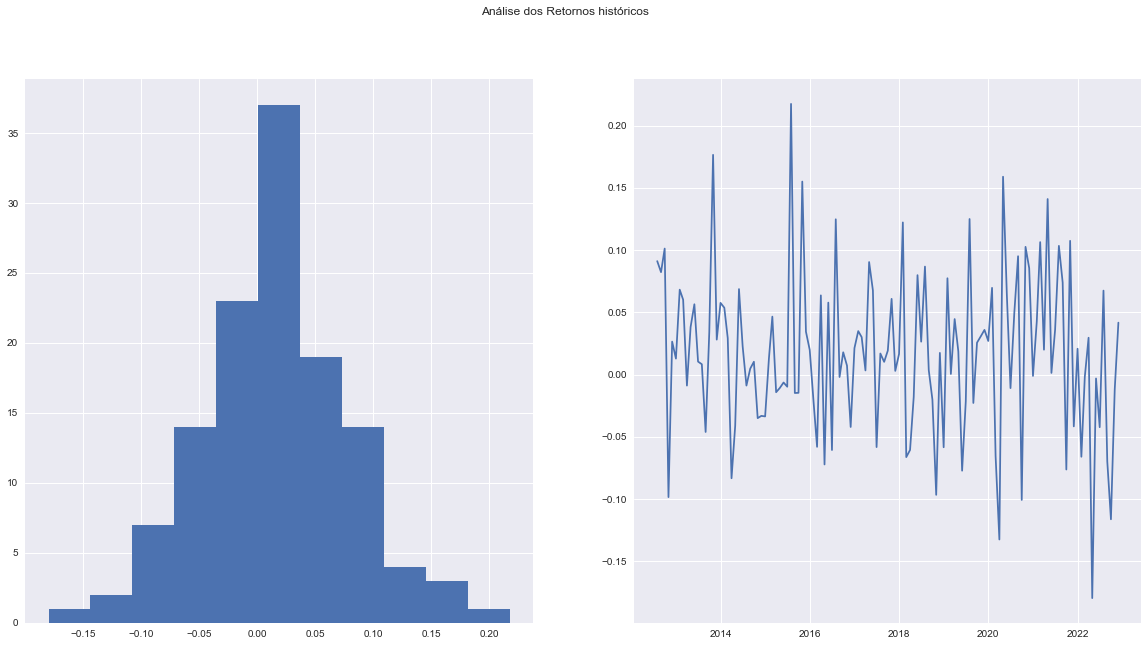

In [36]:
#Agregando retornos diários em retornos mensais
mon = df.resample('1M').last()
mon_rets = mon.pct_change().dropna()

#plotando os retornos mensais
plt.figure()
fig2, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].hist(mon_rets, bins=round(sqrt(len(mon_rets))))
axs[1].plot(mon_rets)
fig2.suptitle('Análise dos Retornos históricos')

#stationarity test

adf = adfuller(mon_rets)
print('ADF Statistics: %f' % adf[0]) 
print('p-value: %f' % adf[1])

In [44]:
dir(gff)

['BeautifulSoup',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'all_factor_links',
 'all_factors_text',
 'bold_tags',
 'carhart4Factor',
 'csv_links',
 'factor_dict',
 'famaFrench3Factor',
 'famaFrench5Factor',
 'ff3factor_dict',
 'home_url',
 'link',
 'links_for_factor',
 'momAndOthers_dict',
 'momentumFactor',
 'pd',
 'relativedelta',
 'requests',
 'response',
 'sib',
 'soup',
 'text',
 'text_to_search',
 'txt_links',
 'url']

In [67]:
gff.url

'http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html'

In [66]:
df = pd.DataFrame(gff.famaFrench3Factor)


ValueError: DataFrame constructor not properly called!